<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/SeojeanKang/drug_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**일시**: 2023. 01. 11 (01.10~01.12 진행)


**사용 데이터셋**: 경구약제 조합 5,000 조합 (https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=576)
training - (TS_4_조합.zip, TL_4_조합.zip)

**데이터셋 구축 목표**: 국내 유동되고 있는 경구약제 5,000종을 대상으로 약품식별 인공지능 개발 및 학습

**환경**: 데이터 업로드하여 colab으로 작업

---
**개인 목표**: 이미지 데이터 전처리 훈련 + 이미지 처리기술 활용하여 경구약제 이미지 학습 및 분류


**실행 내용**: 약제 조합 이미지 데이터 전처리 및 시각화 

> 사진 하나에 약 3개 혹은 4개 조합
>
> 사진과 레이블 경로 리스트화 
>
> bbox 좌표로 경구약제 조합 사진에서 특정 약만 크롭

**발생한 문제**: 1) json으로 DataFrame 만들 때, 37번째 줄에서 UnicodeDecodeError 발생

2) matplotlib으로 그래프 그릴 때, 한글이 깨지는 문제 발생

**해결책**: 1) try-except문으로 오류 난 데이터를 생략하여 임시로 해결 --> 5467개 중 1개 오류, 5466개 DataFrame화


##### import & unzip

In [1]:
import os
import json
import matplotlib.pyplot as plt
import PIL as pil
from PIL import Image
import re
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount("/content/mydrive")

# 라벨링 데이터 압축 해제
!mkdir druglabel
!cd '/content/druglabel' # 압축을 풀 폴더 경로
!unzip -qq '/content/mydrive/MyDrive/jan_prj/TL_4_조합.zip' -d '/content/druglabel' # 압축파일 경로

# 사진 데이터 압축 해제
!mkdir drugphoto
!cd '/content/drugphoto' # 압축을 풀 폴더 경로
!unzip -qq '/content/mydrive/MyDrive/jan_prj/TS_4_조합.zip' -d '/content/drugphoto' # 압축파일 경로

Mounted at /content/mydrive


##### label, photo 데이터 압축 풀기 및 경로 리스트화

In [3]:
# json 레이블 경로 리스트로 만들기

filepath = 'druglabel/'

labeldir1 = [os.path.join(filepath, i) for i in os.listdir(filepath) if os.path.isdir(os.path.join(filepath, i))]

labeldir2=[]
for i in labeldir1:
  fdir = os.listdir(i)
  for j in fdir:
    if os.path.isdir(os.path.join(i, j)):
      labeldir2.append(i + '/' + j)

labeldir3 = []
for i in labeldir2:
  fdir = os.listdir(i)
  for j in fdir:
    labeldir3.append(i + '/' + j)

len(labeldir3)

5467

In [4]:
# 사진 데이터 경로 리스트로 만들기
photopath = 'drugphoto/'

photodir1 = [os.path.join(photopath, i) for i in os.listdir(photopath) if os.path.isdir(os.path.join(photopath, i))]

photodir2=[]
for i in photodir1:
  fdir = os.listdir(i)
  for j in fdir:
    photodir2.append(i + '/' + j)

len(photodir2)

2000

##### json 파일로 image 크롭

In [5]:
# 첫번째 json 데이터로 images, annotations 읽어오기
# labeldir3[0] = druglabel/K-005000-013900-016262_json/K-005000/K-005000-013900-016262_0_2_0_2_75_000_200.json

label1 = open(labeldir3[0])
label1 = json.load(label1)
lbl_img1, lbl_ant1 = label1.get('images'), label1.get('annotations')

# 리스트로 나와서 [0]['칼럼명']
file_name1, bbox1 = lbl_img1[0]['file_name'], lbl_ant1[0]['bbox']
file_name1, bbox1

('K-005000-013900-016262_0_2_0_2_75_000_200.png', [331, 155, 180, 179])

In [6]:
# 해당 json 파일의 이미지 디렉토리 찾기

for i in photodir2:
  if file_name1 in i:
    imgdir1 = i
    print(imgdir1)

drugphoto/K-005000-013900-016262/K-005000-013900-016262_0_2_0_2_75_000_200.png


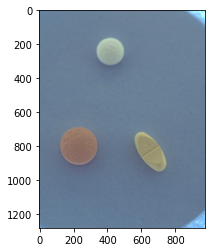

In [7]:
# 이미지 불러오기
img1 = Image.open(imgdir1)
plt.imshow(img1)

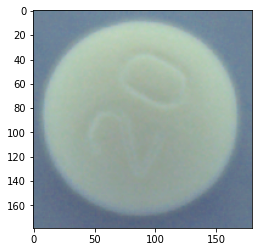

In [8]:
# bbox로 이미지 크롭
x1, y1, w1, h1 = 331, 155, 180, 179
cropped_img1 = img1.crop((x1, y1, x1+w1, y1+h1))

plt.imshow(cropped_img1)
plt.show()

In [9]:
def json_to_img(jsonfile):

  # json 데이터로 images, annotations 읽어오기
  label = open(jsonfile)
  label = json.load(label)
  lbl_img, lbl_ant = label.get('images'), label.get('annotations')

  file_name, bbox = lbl_img[0]['file_name'], lbl_ant[0]['bbox']

  # 해당 json 파일의 이미지 디렉토리 찾기
  for i in photodir2:
    if file_name in i:
      imgdir = i

  img = Image.open(imgdir)

  x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
  cropped_img = img.crop((x, y, x+w, y+h))

  plt.imshow(cropped_img)
  plt.show()

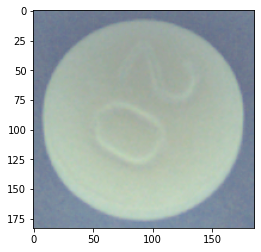

In [10]:
json_to_img(labeldir3[1])

##### img 파일로 json 불러 크롭

'K-006697-006835-020004-029711_0_2_0_2_90_000_200'

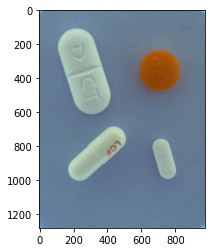

In [11]:
# 임의로 이미지 선택
imgdir2 = photodir2[0]
imgdir2

img2 = Image.open(imgdir2)
plt.imshow(img2)

# re 사용하여 이미지 경로에서 이미지 제목만 뽑아내기
pattern1 = r'(K-[\w-]+)\.png'
img_title2 = re.findall(pattern1, imgdir2)
img_title2[0]

In [12]:
# 이미지 제목으로 json label 경로 불러오기
lst = []
for i in labeldir3:
  if img_title2[0] in i:
    lst.append(i)

lst

['druglabel/K-006697-006835-020004-029711_json/K-020004/K-006697-006835-020004-029711_0_2_0_2_90_000_200.json',
 'druglabel/K-006697-006835-020004-029711_json/K-006697/K-006697-006835-020004-029711_0_2_0_2_90_000_200.json',
 'druglabel/K-006697-006835-020004-029711_json/K-006835/K-006697-006835-020004-029711_0_2_0_2_90_000_200.json',
 'druglabel/K-006697-006835-020004-029711_json/K-029711/K-006697-006835-020004-029711_0_2_0_2_90_000_200.json']

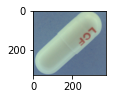

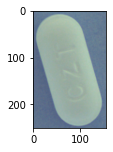

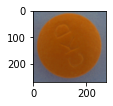

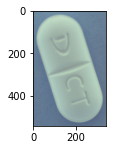

In [13]:
# for문으로 lst에 든 json, bbox 좌표 불러오기
# 크롭

for i in range(len(lst)):
  label2 = open(lst[i])
  label2 = json.load(label2)
  lbl2_ant = label2.get('annotations')
  bbox2 = lbl2_ant[0]['bbox']

  x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

  cropped_img2 = img2.crop((x2, y2, x2+w2, y2+h2))

  plt.subplot(1, len(lst), i+1)
  plt.imshow(cropped_img2)
  plt.show()

In [14]:
def img_to_json(imgfile):
  img = Image.open(imgfile)

  # img 경로에서 img_title 제목 추출
  pattern = r'(K-[\w-]+)\.png'
  img_title = re.findall(pattern, imgfile)
  img_title[0]
  
  # 추출한 제목으로 
  labels = [i for i in labeldir3 if img_title[0] in i]

  img_info = []
  cropped = []

  # image crop
  for i in range(len(labels)):
    label = open(labels[i])
    label = json.load(label)
    lbl_ant = label.get('annotations')
    bbox = lbl_ant[0]['bbox']
    
    x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]

    cropped_img = img.crop((x, y, x+w, y+h))
    cropped.append(cropped_img)

    plt.subplot(1, len(labels), i+1)
    plt.imshow(cropped_img)
    plt.show()

    # json files에서 'image' 골라내 리스트화
    lbl_image = label.get('images')
    img_info.append(lbl_image[0])
    
  # json dataframe
  df = pd.json_normalize(img_info[0])
  for info in img_info[1:]:
    temp = pd.json_normalize(info)
    df = df.append(temp)
    df = df.reset_index(drop=True)

  # return labels   # json 경로 리스트로 반환
  return df       # json images 데이터프레임으로 반환
  # return cropped  # 크롭된 img 반환

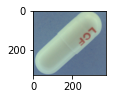

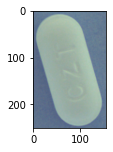

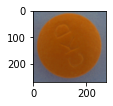

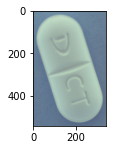

,file_name,width,height,imgfile,drug_N,drug_S,back_color,drug_dir,light_color,camera_la,camera_lo,size,dl_idx,dl_mapping_code,dl_name,dl_name_en,img_key,dl_material,dl_material_en,dl_custom_shape,dl_company,dl_company_en,di_company_mf,di_company_mf_en,item_seq,di_item_permit_date,di_class_no,di_etc_otc_code,di_edi_code,chart,drug_shape,thick,leng_long,leng_short,print_front,print_back,color_class1,color_class2,line_front,line_back,img_regist_ts,form_code_name,mark_code_front_anal,mark_code_back_anal,mark_code_front_img,mark_code_back_img,mark_code_front,mark_code_back,change_date,id
0,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,976,1280,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,K-020004,정상알약,연회색 배경,앞면,주백색,90,0,200,20003,K-020004,라시도필캡슐(비매품),Lacidofil Cap.,http://connectdi.com/design/img/drug/1MqVySVqR...,락토바실루스람노수스R0011균락토바실루스헬베티쿠스R0052균혼합분말,Mixed powder of Bacteria Culture of Lactobacil...,경질캡슐제,(주)한국팜비오,Pharmbio,,,200611395,20060711,[02370]정장제,일반의약품,"659900030,A84900011",연한 갈색 가루가 있는 미백색 분말의 상하부 백색 내지 미백색의 경질캡슐,장방형,6.20,17.40,5.90,LCF,,하양,하양,,,20080922,"경질캡슐제, 산제",,,,,,,20160325,1
1,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,976,1280,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,K-006697,정상알약,연회색 배경,앞면,주백색,90,0,200,6696,K-006697,씨즈날정(세티리진염산염),Ssiznal Tab.,http://connectdi.com/design/img/drug/147427668...,세티리진염산염,Ceftibuten Hydrate,"정제, 저작정",(주)녹십자,Green Cross Corp,,,199703153,19971118,[01410]항히스타민제,일반의약품,"643601250,A35550381",흰색의 타원형 필름코팅정,장방형,2.80,10.30,4.30,CZT,분할선,하양,,,-,20050329,필름코팅정,,,,,,,20210212,1
2,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,976,1280,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,K-006835,정상알약,연회색 배경,앞면,주백색,90,0,200,6834,K-006835,이튼큐정 35mg/PTP,Eten Q Tab.,http://connectdi.com/design/img/drug/1NW2jyerd...,옥수수불검화정량추출물,Titrated Ext. of the Unsaponifiable Fraction o...,"정제, 저작정",(주)종근당,Chong Kun Dang Pharmaceutical,동성제약(주),Dongsung Bio Pharm,199704687,19970104,[02310]치과구강용약,일반의약품,643302310,주황색의 원형 필름코팅정,원형,5.10,10.30,10.30,CKD,,주황,,,,20120411,필름코팅정,,,,,,,20201117,1
3,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,976,1280,K-006697-006835-020004-029711_0_2_0_2_90_000_2...,K-029711,정상알약,연회색 배경,앞면,주백색,90,0,200,29710,K-029711,디카테오정,Dicateo Tab.,http://connectdi.com/design/img/drug/1NdqgsHv8...,시트르산칼슘|농축콜레칼시페롤 과립,Calcium Citrate| Cholecalciferol Concentrated Gr.,"정제, 저작정",(주)다림바이오텍,Dalimbiotech Company,한국코러스(주),Koruspharm,201205447,20120607,[03210]칼슘제,일반의약품,664602090,흰색의 장방형 정제,장방형,7.56,21.81,9.31,마크분할선CT,,하양,,-,,20120711,나정,D,,http://connectdi.com/design/img/drug/147938640...,,,,None,1


In [15]:
df = img_to_json(imgdir2)
df

##### label로 DataFrame -- 시각화

In [25]:
# 인덱스0인 label로 데이터프레임 만들기
json_img = open(labeldir3[0])
json_img = json.load(json_img)
df_img = json_img.get('images')
df_img = pd.json_normalize(df_img)
df_img

,file_name,width,height,imgfile,drug_N,drug_S,back_color,drug_dir,light_color,camera_la,camera_lo,size,dl_idx,dl_mapping_code,dl_name,dl_name_en,img_key,dl_material,dl_material_en,dl_custom_shape,dl_company,dl_company_en,di_company_mf,di_company_mf_en,item_seq,di_item_permit_date,di_class_no,di_etc_otc_code,di_edi_code,chart,drug_shape,thick,leng_long,leng_short,print_front,print_back,color_class1,color_class2,line_front,line_back,img_regist_ts,form_code_name,mark_code_front_anal,mark_code_back_anal,mark_code_front_img,mark_code_back_img,mark_code_front,mark_code_back,change_date,id
0,K-005000-013900-016262_0_2_0_2_75_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_75_000_200.png,K-005000,정상알약,연회색 배경,앞면,주백색,75,0,200,4999,K-005000,비유피-4정 20mg,BUP-4 Tab. 20mg,http://connectdi.com/design/img/drug/147427664...,프로피베린염산염,Propiverine Hydrochloride,"정제, 저작정",제일약품(주),Jeil Pharmaceutical,,,199500420,19951030,[02590]기타의 비뇨생식기관 및 항문용약,전문의약품,"645400480,A04203601",이 약은 백색의 편평구형의 필름코팅정으로 냄새는 없다.,원형,3.43,7.11,7.11,20,,하양,,,,20041222,필름코팅정,,,,,,,20190802,1


In [ ]:
# for 문으로 json 파일 읽어온 후 df_img DataFrame에 추가
# for i in range(1, len(labeldir3)):
#   js = open(labeldir3[i])
#   js = json.load(js, encoding='euc-kr')
#   jsdf = js.get('images')
#   jsdf = pd.json_normalize(jsdf)
#   df_img = df_img.append(jsdf)

# df_img = df_img.reset_index(drop=True)

# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte

In [26]:
# 임시해결책: try - except로 UnicodeDecodeError skip

for i in range(1, len(labeldir3)):
  js = open(labeldir3[i])
  try:
    js = json.load(js)
    jsdf = js.get('images')
    jsdf = pd.json_normalize(jsdf)
    df_img = df_img.append(jsdf)
  except UnicodeDecodeError:
    continue

df_img = df_img.reset_index(drop=True)

In [28]:
# 총 5467 rows x 50 columns 중
# 5466 rows x 50 columns
df_img 

,file_name,width,height,imgfile,drug_N,drug_S,back_color,drug_dir,light_color,camera_la,camera_lo,size,dl_idx,dl_mapping_code,dl_name,dl_name_en,img_key,dl_material,dl_material_en,dl_custom_shape,dl_company,dl_company_en,di_company_mf,di_company_mf_en,item_seq,di_item_permit_date,di_class_no,di_etc_otc_code,di_edi_code,chart,drug_shape,thick,leng_long,leng_short,print_front,print_back,color_class1,color_class2,line_front,line_back,img_regist_ts,form_code_name,mark_code_front_anal,mark_code_back_anal,mark_code_front_img,mark_code_back_img,mark_code_front,mark_code_back,change_date,id
0,K-005000-013900-016262_0_2_0_2_75_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_75_000_200.png,K-005000,정상알약,연회색 배경,앞면,주백색,75,0,200,4999,K-005000,비유피-4정 20mg,BUP-4 Tab. 20mg,http://connectdi.com/design/img/drug/147427664...,프로피베린염산염,Propiverine Hydrochloride,"정제, 저작정",제일약품(주),Jeil Pharmaceutical,,,199500420,19951030,[02590]기타의 비뇨생식기관 및 항문용약,전문의약품,"645400480,A04203601",이 약은 백색의 편평구형의 필름코팅정으로 냄새는 없다.,원형,3.43,7.11,7.11,20,,하양,,,,20041222,필름코팅정,,,,,,,20190802,1
1,K-005000-013900-016262_0_2_0_2_70_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_70_000_200.png,K-005000,정상알약,연회색 배경,앞면,주백색,70,0,200,4999,K-005000,비유피-4정 20mg,BUP-4 Tab. 20mg,http://connectdi.com/design/img/drug/147427664...,프로피베린염산염,Propiverine Hydrochloride,"정제, 저작정",제일약품(주),Jeil Pharmaceutical,,,199500420,19951030,[02590]기타의 비뇨생식기관 및 항문용약,전문의약품,"645400480,A04203601",이 약은 백색의 편평구형의 필름코팅정으로 냄새는 없다.,원형,3.43,7.11,7.11,20,,하양,,,,20041222,필름코팅정,,,,,,,20190802,1
2,K-005000-013900-016262_0_2_0_2_90_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_90_000_200.png,K-005000,정상알약,연회색 배경,앞면,주백색,90,0,200,4999,K-005000,비유피-4정 20mg,BUP-4 Tab. 20mg,http://connectdi.com/design/img/drug/147427664...,프로피베린염산염,Propiverine Hydrochloride,"정제, 저작정",제일약품(주),Jeil Pharmaceutical,,,199500420,19951030,[02590]기타의 비뇨생식기관 및 항문용약,전문의약품,"645400480,A04203601",이 약은 백색의 편평구형의 필름코팅정으로 냄새는 없다.,원형,3.43,7.11,7.11,20,,하양,,,,20041222,필름코팅정,,,,,,,20190802,1
3,K-005000-013900-016262_0_2_0_2_75_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_75_000_200.png,K-013900,정상알약,연회색 배경,앞면,주백색,75,0,200,13899,K-013900,에빅사정(메만틴염산염)(비매품),Ebixa Tab.,http://connectdi.com/design/img/drug/150825481...,메만틴염산염,Memantine Hydrochloride,"정제, 저작정",한국룬드벡(주),Lundbeck Korea,,,200308324,20030918,[01190]기타의 중추신경용약,전문의약품,"668000040,E25650021",연한 노랑에서 노란색의 타원형 필름코팅정,타원형,3.50,11.20,5.20,M분할선,1분할선0,노랑,,-,-,20120619,필름코팅정,,,,,,,20201207,1
4,K-005000-013900-016262_0_2_0_2_70_000_200.png,976,1280,K-005000-013900-016262_0_2_0_2_70_000_200.png,K-013900,정상알약,연회색 배경,앞면,주백색,70,0,200,13899,K-013900,에빅사정(메만틴염산염)(비매품),Ebixa Tab.,http://connectdi.com/design/img/drug/150825481...,메만틴염산염,Memantine Hydrochloride,"정제, 저작정",한국룬드벡(주),Lundbeck Korea,,,200308324,20030918,[01190]기타의 중추신경용약,전문의약품,"668000040,E25650021",연한 노랑에서 노란색의 타원형 필름코팅정,타원형,3.50,11.20,5.20,M분할선,1분할선0,노랑,,-,-,20120619,필름코팅정,,,,,,,20201207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,K-004378-005094-012778-013161_0_2_0_2_75_000_2...,976,1280,K-004378-005094-012778-013161_0_2_0_2_75_000_2...,K-012778,정상알약,연회색 배경,앞면,주백색,75,0,200,12777,K-012778,다보타민큐정 10mg/병,Dabotamin Q Tab.,http://connectdi.com/design/img/drug/154601167...,,Ascorbic Acid Gr. 97%| Biotin 1%| Calcium Pant...,"정제, 저작정",(주)유한양행,Yuhan,,,200300416,20030523,[03160]혼합비타민제(비타민AD 혼합제제를 제외),일반의약품,642100140,적갈색의 타원형 제피정,타원형,6.02,19.20,8.30,Y분할선H,,갈색,,-,,20041222,필름코팅정,,,,,,,20210330,1
5462,K-004378-005094-012778-013161_0_2_0_2_90_000_2...,976,1280,K-004378-005094-012778-013161_0_2_0_2_90_000_2...,K-012778,정상알약,연회색 배경,앞면,주백색,90,0,200,12777,K-012778,다보타민큐정 10mg/병,Dabotamin Q Tab.,http://connectdi.com/design/img/drug/154601167...,,Ascorbic Acid Gr. 97%| Biotin 1%| Calcium Pant...,"정제, 저작정",(주)유한양행,Yuhan,,,200300416,20030523,[03160]혼합비타민제(비타민AD 혼합제제를 제외),일반의약품,642100140,적갈색의 타원형 제피정,타원형,6.

In [30]:
# 한글이 깨져서 영어로 된 열 추출
df_en = df_img[['file_name', 'drug_N', 'dl_name_en', 'dl_material_en', 'dl_company_en', 'di_class_no']]
df_en

,file_name,drug_N,dl_name_en,dl_material_en,dl_company_en,di_class_no
0,K-005000-013900-016262_0_2_0_2_75_000_200.png,K-005000,BUP-4 Tab. 20mg,Propiverine Hydrochloride,Jeil Pharmaceutical,[02590]기타의 비뇨생식기관 및 항문용약
1,K-005000-013900-016262_0_2_0_2_70_000_200.png,K-005000,BUP-4 Tab. 20mg,Propiverine Hydrochloride,Jeil Pharmaceutical,[02590]기타의 비뇨생식기관 및 항문용약
2,K-005000-013900-016262_0_2_0_2_90_000_200.png,K-005000,BUP-4 Tab. 20mg,Propiverine Hydrochloride,Jeil Pharmaceutical,[02590]기타의 비뇨생식기관 및 항문용약
3,K-005000-013900-016262_0_2_0_2_75_000_200.png,K-013900,Ebixa Tab.,Memantine Hydrochloride,Lundbeck Korea,[01190]기타의 중추신경용약
4,K-005000-013900-016262_0_2_0_2_70_000_200.png,K-013900,Ebixa Tab.,Memantine Hydrochloride,Lundbeck Korea,[01190]기타의 중추신경용약
...,...,...,...,...,...,...
5461,K-004378-005094-012778-013161_0_2_0_2_75_000_2...,K-012778,Dabotamin Q Tab.,Ascorbic Acid Gr. 97%| Biotin 1%| Calcium Pant...,Yuhan,[03160]혼합비타민제(비타민AD 혼합제제를 제외)
5462,K-004378-005094-012778-013161_0_2_0_2_90_000_2...,K-012778,Dabotamin Q Tab.,Ascorbic Acid Gr. 97%| Biotin 1%| Calcium Pant...,Yuhan,[03160]혼합비타민제(비타민AD 혼합제제를 제외)
5463,K-004378-005094-012778-013161_0_2_0_2_70_000_2...,K-005094,Dried Aluminium Hydroxide Gel Tab. Samnam,Dried Aluminum Hydroxide Gel,Samnam,[02340]제산제
5464,K-004378-005094-012778-013161_0_2_0_2_75_000_2...,K-005094,Dried Aluminium Hydroxide Gel Tab. Samnam,Dried Aluminum Hydroxide Gel,Samnam,[02340]제산제


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_

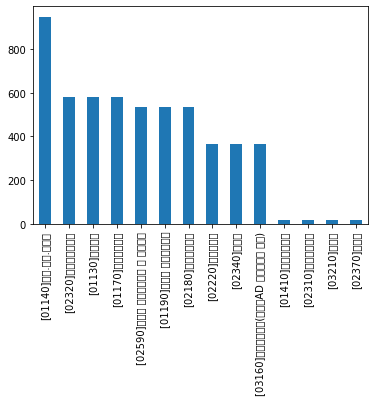

In [33]:
# 한글이 깨지는 문제점 발생
df_en['di_class_no'].value_counts().plot(kind='bar')